In [353]:
import glob
import pandas as pd
import seaborn as sns
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt
from matplotlib import colormaps
import statistics

In [355]:

def get_values_forn_iterations(n, ret, file_list, normalize, environments_list,algos_list):

    only_consider_runs_with_minimum_length_of = n
    only_take_the_first_n_iterations = n
    threshold_factor_for_finding_the_best_time_found = 1.02
    
    dict_overview_best_time = {}
    dict_overview_opt_time = {}
    
    for file in file_list:
    
        env = file.split("/")[-1].split("\\")[-3]
        algo = file.split("\\")[-2]
        #print(algo)

        #if "_n_" in algo:
        #    continue

        #print(algo)
    

        #the names of the transfer algorithms differ per environemnt. so map them to a simple name
        if "zero_shot_transfer_exc" in algo : 
            algo = "zero_shot_exc"
        if "zero_shot_transfer_all" in algo : 
            algo = "zero_shot_all"


        if "own_random_search" in algo:
            algo = "own_random_search"

        if "zero_shot_exc" in algo : 
            algo = "zero_shot_exc"
        if "zero_shot_all" in algo : 
            algo = "zero_shot_all"

        
        if "quantile_exc" in algo : 
            algo = "quantile_exc"
        if "quantile_all" in algo : 
            algo = "quantile_all"
            
        if "quantile_transfer_exc" in algo : 
            algo = "quantile_exc"
        if "quantile_transfer_all" in algo : 
            algo = "quantile_all"
            
        if "tlbo_rgpe_prf_all" in algo : 
            algo = "tlbo_rgpe_prf_all"
        if "tlbo_sgpr_prf_all" in algo : 
            algo = "tlbo_sgpr_prf_all"
        if "tlbo_topov3_prf_all" in algo : 
            algo = "tlbo_topov3_prf_all"
        if "tlbo_rgpe_gp_all" in algo : 
            algo = "tlbo_rgpe_gp_all"
        if "tlbo_sgpr_gp_all" in algo : 
            algo = "tlbo_sgpr_gp_all"
        if "tlbo_topov3_gp_all" in algo : 
            algo = "tlbo_topov3_gp_all"
        if "tlbo_rgpe_prf_exc" in algo : 
            algo = "tlbo_rgpe_prf_exc"
        if "tlbo_sgpr_prf_exc" in algo : 
            algo = "tlbo_sgpr_prf_exc"
        if "tlbo_topov3_prf_exc" in algo : 
            algo = "tlbo_topov3_prf_exc"
        if "tlbo_rgpe_gp_exc" in algo : 
            algo = "tlbo_rgpe_gp_exc"
        if "tlbo_sgpr_gp_exc" in algo : 
            algo = "tlbo_sgpr_gp_exc"
        if "tlbo_topov3_gp_exc" in algo : 
            algo = "tlbo_topov3_gp_exc"

        if "bayesian_open_box" in algo:
            algo = "bayesian_open_box"


        if algo == "cost_model_rfs_bay_exc_w_update":
            algo = "cost_model_rfs_bay_exc_w_update"
        elif algo == "cost_model_rfs_bay_exc_w_update_cluster":
            algo = "cost_model_rfs_bay_exc_w_update_cluster"
        elif algo == "cost_model_rfs_rs_exc_w_update":
            algo = "cost_model_rfs_rs_exc_w_update"
        elif algo == "cost_model_rfs_rs_exc_w_update_cluster":
            algo = "cost_model_rfs_rs_exc_w_update_cluster"
            
       
        '''   
        if "cost_model_rfs_all" in algo : 
            algo = "cost_model_rfs_all"
        if "cost_model_rfs_rs_exc" in algo : 
            if "update" in algo:
                algo = "cost_model_rfs_rs_exc_update"
                #print("found update")
            else:
                algo = "cost_model_rfs_rs_exc"
                #print("found no update")

       
        
        algo_orig = file.split("\\")[-2]
        if "clustering" in algo_orig :
            algo = algo + "_clustering"


        if "_non_neg" in algo_orig :
            algo = algo + "_non_neg"

        if "_ndr" in algo_orig :
            algo = algo + "_ndr"

        if "test_cost_model" in algo_orig:
            algo = "test_cost_model"
        '''
        if algo not in algos_list:
            continue

     
        df = pd.read_csv(file)
        df = df[df['time'] > 0]
    
        df = df.head(only_take_the_first_n_iterations) 
    
    
        # sometimes there are marginal improvments late in the optimization run.
        # this would worsen the optimization time by alot, while barely improving the best time
        # the mitigate this, we take the first time that is within a certain threshold of the overall best time
    
        
        best_time_found = df['time'].min()
        threshold = best_time_found * threshold_factor_for_finding_the_best_time_found        
        first_within_threshold_index = df[df['time'] <= threshold].index[0] # first time within threshold        
        first_within_threshold_time = df.loc[first_within_threshold_index, 'time']    
        time_till_best_time_found = df['seconds_since_start_of_opt_run'][first_within_threshold_index]        
        best_time_found = first_within_threshold_time        
        
        if algo not in dict_overview_best_time.keys() :
            dict_overview_best_time[algo] = {}
        if env not in dict_overview_best_time[algo].keys(): 
            dict_overview_best_time[algo][env] = []
    
        if algo not in dict_overview_opt_time.keys() :
            dict_overview_opt_time[algo] = {}
        if env not in dict_overview_opt_time[algo].keys(): 
            dict_overview_opt_time[algo][env] = []
    
        dict_overview_best_time[algo][env].append(float(best_time_found))
        dict_overview_opt_time[algo][env].append(float(time_till_best_time_found))
    
 
    
    # average all best times and all opt times
   
    dict_best_times_avg = {}
    
    for algo in algos_list:
        if algo in dict_overview_best_time.keys():              
            for environment in environments_list:                 
                if environment in dict_overview_best_time[algo].keys():  
                    if algo not in dict_best_times_avg.keys() :
                        dict_best_times_avg[algo] = []    
                        
                    dict_best_times_avg[algo].append(statistics.mean(dict_overview_best_time[algo][environment]))
                else:    
                    if algo not in dict_best_times_avg.keys() :
                        dict_best_times_avg[algo] = []
                    
                    dict_best_times_avg[algo].append(0)
        else:
            dict_best_times_avg[algo] = [0,0,0,0,0,0,0,0,0]
    
    
    dict_opt_times_avg = {}
    
    for algo in algos_list:    
        if algo in dict_overview_best_time.keys():    
            for environment in environments_list:    
                if environment in dict_overview_opt_time[algo].keys():    
                    if algo not in dict_opt_times_avg.keys() :
                        dict_opt_times_avg[algo] = []                    
                    dict_opt_times_avg[algo].append(statistics.mean(dict_overview_opt_time[algo][environment]))
                else:
                    if algo not in dict_opt_times_avg.keys() :
                        dict_opt_times_avg[algo] = []
                        
                    dict_opt_times_avg[algo].append(0)
        else:
            dict_opt_times_avg[algo] = [0,0,0,0,0,0,0,0,0]

    
    
    y_ho_best_time = [35.612375,
            43.532109,
            200.537612,
            33.657328,
            282.683184,
            45.547918,
            200.643825,
            194.539774,
            274.713645]
    
    y_ho_opt_time = [1177.365123,
            1198.242616,
            1359.707448,
            1166.210685,
            3195.257691,
            1181.727674,
            1751.303572,
            1327.74072,
            3187.719483]
    
    if 'heuristic' in algos_list:
        dict_opt_times_avg["heuristic"] = y_ho_opt_time
        dict_best_times_avg["heuristic"] = y_ho_best_time
    
    
    random_opt_times = dict_opt_times_avg['random_search_syne_tune']
    normalized_opt_times = {}
    normalized_opt_times_avg = {}
    
    for algo in dict_opt_times_avg.keys():
        
        if dict_opt_times_avg[algo] == 0:
            normalized_opt_times_avg[algo] = 0
            continue

        if normalize:
            normalized_opt_times[algo] = [i / j if j != 0 and i != 0 else 0 for i, j in zip(dict_opt_times_avg[algo], random_opt_times)]
            non_zero_values = [value for value in normalized_opt_times[algo] if value != 0]
            if non_zero_values:
                normalized_opt_times_avg[algo] = statistics.mean(non_zero_values) * 100
            else:
                normalized_opt_times_avg[algo] = 0
        else:
            non_zero_values = [value for value in dict_opt_times_avg[algo] if value != 0]
            if non_zero_values:
                normalized_opt_times_avg[algo] = statistics.mean(non_zero_values)
            else:
                normalized_opt_times_avg[algo] = 0


    random_best_times = dict_best_times_avg['random_search_syne_tune']
    normalized_best_times = {}
    normalized_best_times_avg = {}
    for algo in dict_opt_times_avg.keys():

        if dict_best_times_avg[algo] == 0:
            normalized_best_times_avg[algo] = 0
            continue

        
        if normalize:
            normalized_best_times[algo] = [i / j if j != 0 and i != 0 else 0 for i, j in zip(dict_best_times_avg[algo], random_best_times)]

            non_zero_values = [value for value in normalized_best_times[algo] if value != 0]
            if non_zero_values:
                normalized_best_times_avg[algo] = statistics.mean(non_zero_values) * 100
            else:
                normalized_best_times_avg[algo] = 0
        else:
            non_zero_values = [value for value in dict_best_times_avg[algo] if value != 0]
            if non_zero_values:
                normalized_best_times_avg[algo] = statistics.mean(non_zero_values)
            else:
                normalized_best_times_avg[algo] = 0
   
    if ret == 'opt':
        return normalized_opt_times_avg
    else:
        return normalized_best_times_avg

In [357]:
def plot(args):   
    #['opt',True,"%",25,file_list,environments_list,algorithms],
    #title 1
    #type 2
    #normalize 3
    #max n 4
    #file 5
    # env 6
    #algos 7



    
    #color_mapping = args[5]
    max_n = args[4]

    file_list = args[5]
    environments_list = args[6]
    algorithms = args[7]

    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Create a mapping of algorithms to the default colors
    
    default_colors_cycle = cycle([color for color in default_colors if color != "red"])  # Exclude red
    color_mapping = {alg: (next(default_colors_cycle) if alg != "random_search_syne_tune" else "red") for alg in algorithms}

    
    results = pd.DataFrame()
    for n in range(1, max_n + 1):
        result_best = get_values_forn_iterations(n,args[1],file_list,args[2],environments_list,algorithms)
        df_inner = pd.DataFrame(result_best, index=[0])
        results = pd.concat([results, df_inner], axis=0)
    results.reset_index(drop=True, inplace=True)
    df = pd.DataFrame(results)
    sorted_columns = df.iloc[-1].sort_values(ascending=False).index
    df_sorted = df[sorted_columns]
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    # Plot each algorithm with its specified color
    for col in df_sorted.columns:
        df_sorted[col].plot(
            ax=ax,
            label=col,
            color=color_mapping.get(col, "black"),
            linewidth=2 if col == "random_search_syne_tune" else 1,
        )
    ax.legend(title="Algorithms", bbox_to_anchor=(1.05, 0.5), loc="center left")
    plt.xlabel("Iterations")
    plt.ylabel(args[3])
    plt.ylim(bottom=0)
    plt.title(args[0])
    plt.tight_layout()
    plt.grid(True)
    # Show the plot
    plt.show()

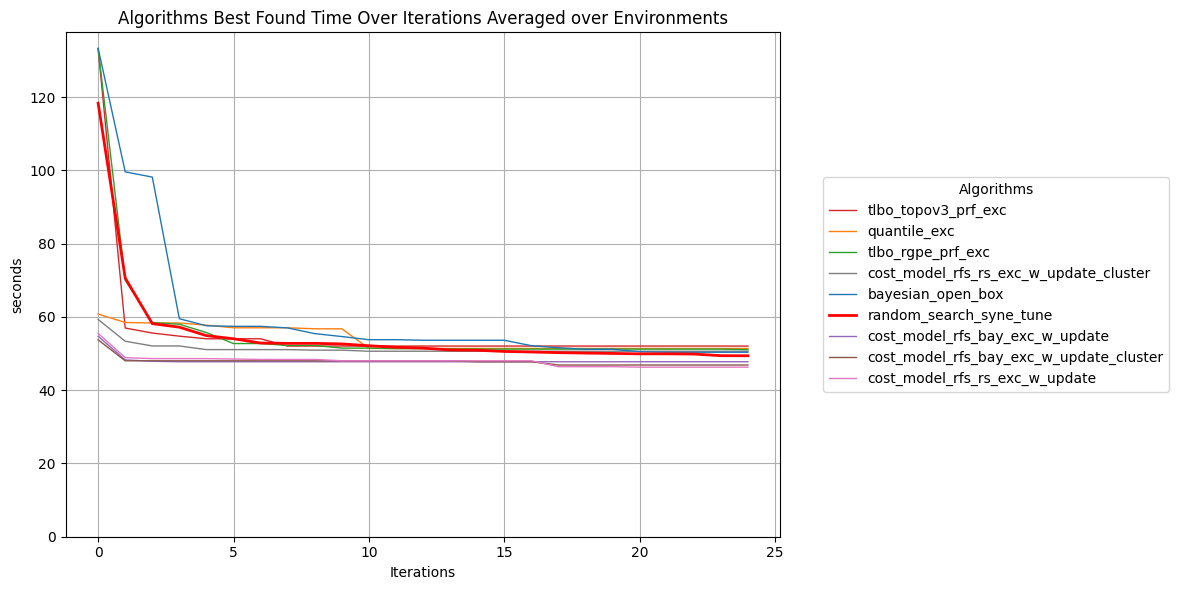

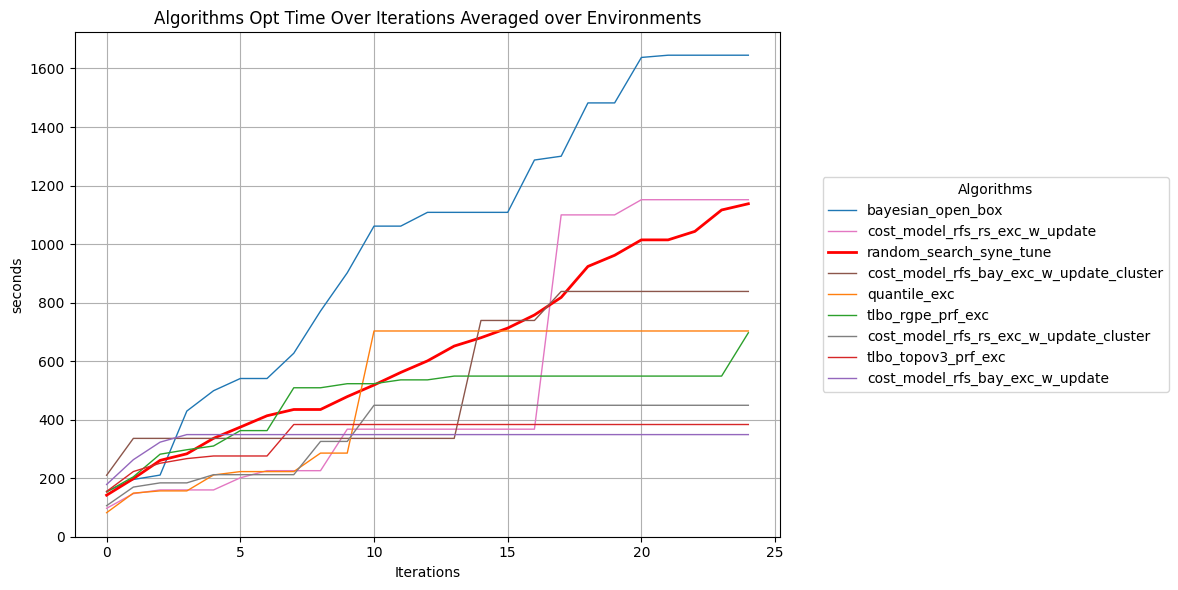

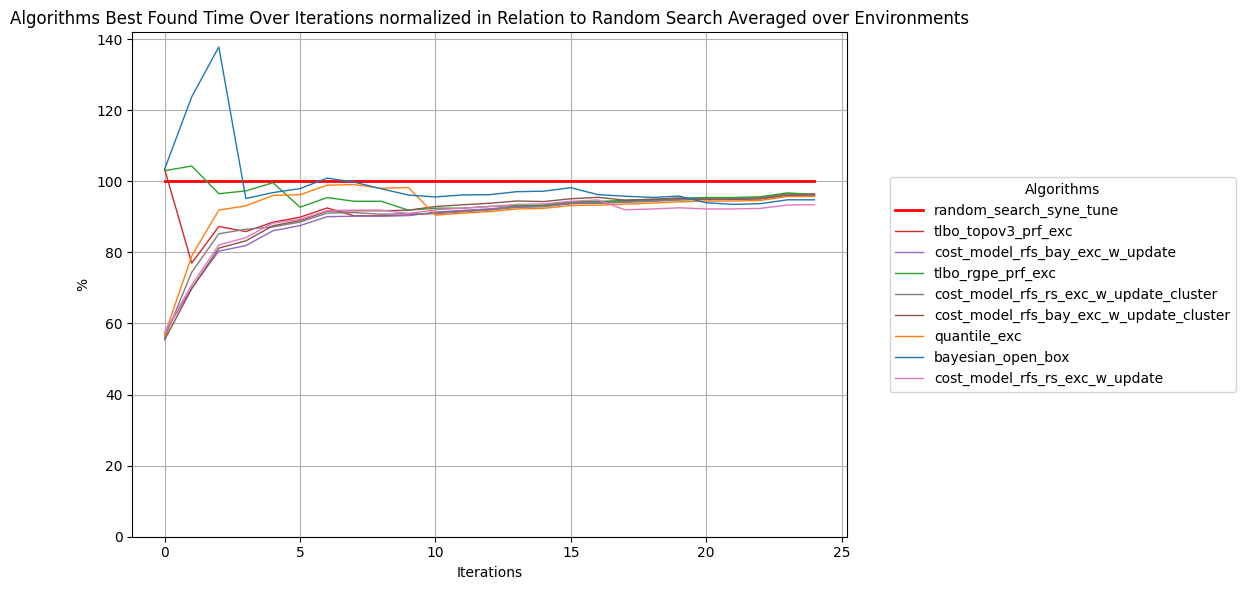

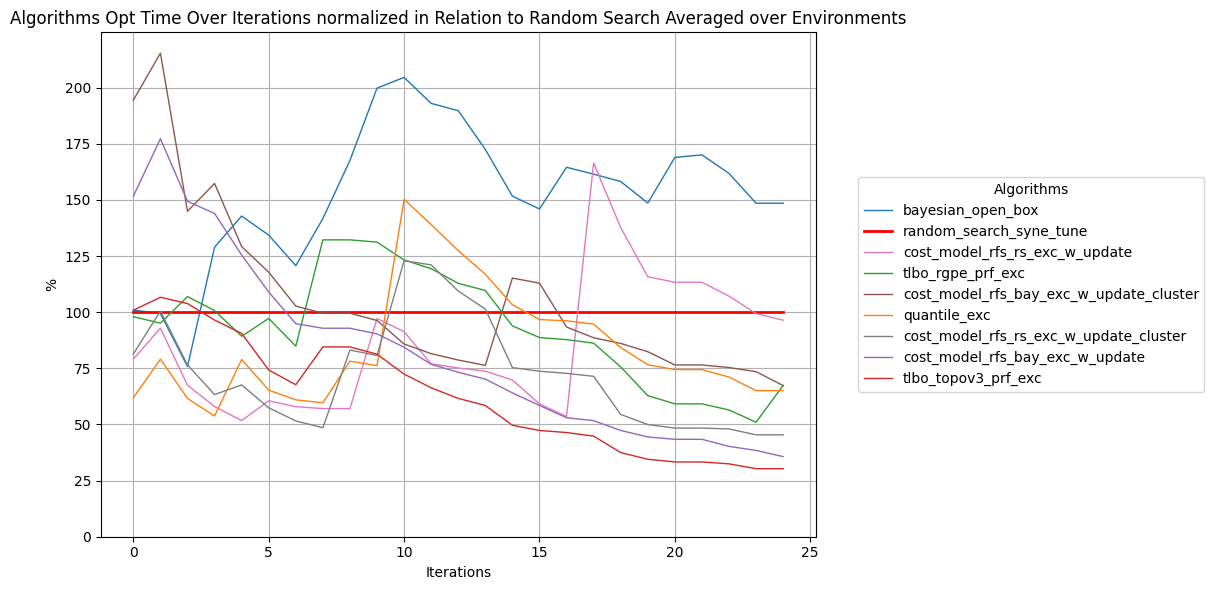

In [361]:
from itertools import cycle

algorithms = [
    "random_search_syne_tune", 
    #"own_random_search",
    "bayesian_open_box", 
    #"bayesian_syne_tune", 
    #"zero_shot_exc",
    #"zero_shot_all",
    
    "quantile_exc",

    #"quantile_all", 
    #"cost_model_rfs_all",
    #"cost_model_rfs_exc",
    #"tlbo_rgpe_prf_all",
    #"tlbo_sgpr_prf_all",    
    #"tlbo_topov3_prf_all",    
    #"tlbo_rgpe_gp_all",    
    #"tlbo_sgpr_gp_all",
    #"tlbo_topov3_gp_all", 
    
    "tlbo_rgpe_prf_exc",    

    #"tlbo_sgpr_prf_exc",
    
    "tlbo_topov3_prf_exc",
    
    #"tlbo_rgpe_gp_exc",    
    #"tlbo_sgpr_gp_exc",    
    #"tlbo_topov3_gp_exc",
    "cost_model_rfs_bay_exc_w_update",
    "cost_model_rfs_bay_exc_w_update_cluster",
    "cost_model_rfs_rs_exc_w_update",
    "cost_model_rfs_rs_exc_w_update_cluster",

    #"cost_model_rfs_rs_exc"
]
file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_1310k/*/*/*.csv')

environments_list =["S2_C2_N50",
                    "S8_C2_N50",
                    "S16_C16_N50",
                
                    "S2_C2_N150",
                    "S8_C2_N150",
                    "S16_C16_N150",
                
                    "S2_C2_N1000",
                    "S8_C2_N1000",
                    "S16_C16_N1000"]

plots = [
        #["title",tpye,normalize,unit.max n , filelist,envs,algos],
        ["Algorithms Best Found Time Over Iterations Averaged over Environments",
         'best',False,'seconds',25,file_list,environments_list,algorithms],
    
        ["Algorithms Opt Time Over Iterations Averaged over Environments",
         'opt',False,'seconds',25,file_list,environments_list,algorithms],
        
        ["Algorithms Best Found Time Over Iterations normalized in Relation to Random Search Averaged over Environments",
         'best',True,"%",25,file_list,environments_list,algorithms],
    
        ["Algorithms Opt Time Over Iterations normalized in Relation to Random Search Averaged over Environments",
         'opt',True,"%",25,file_list,environments_list,algorithms],
         
]

for args in plots:
    plot(args)

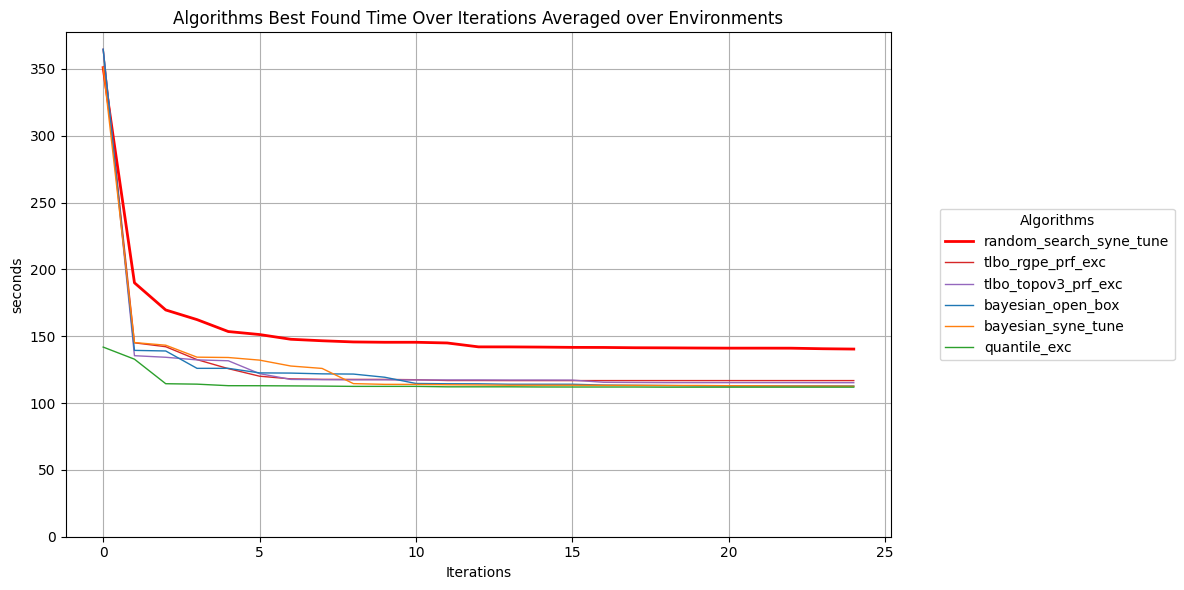

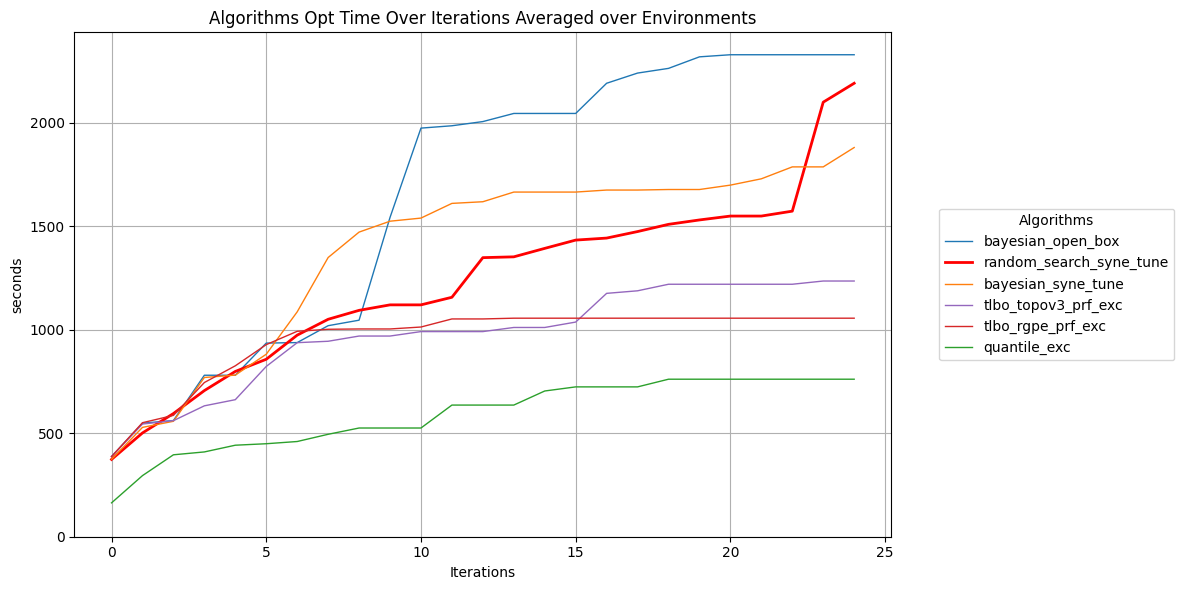

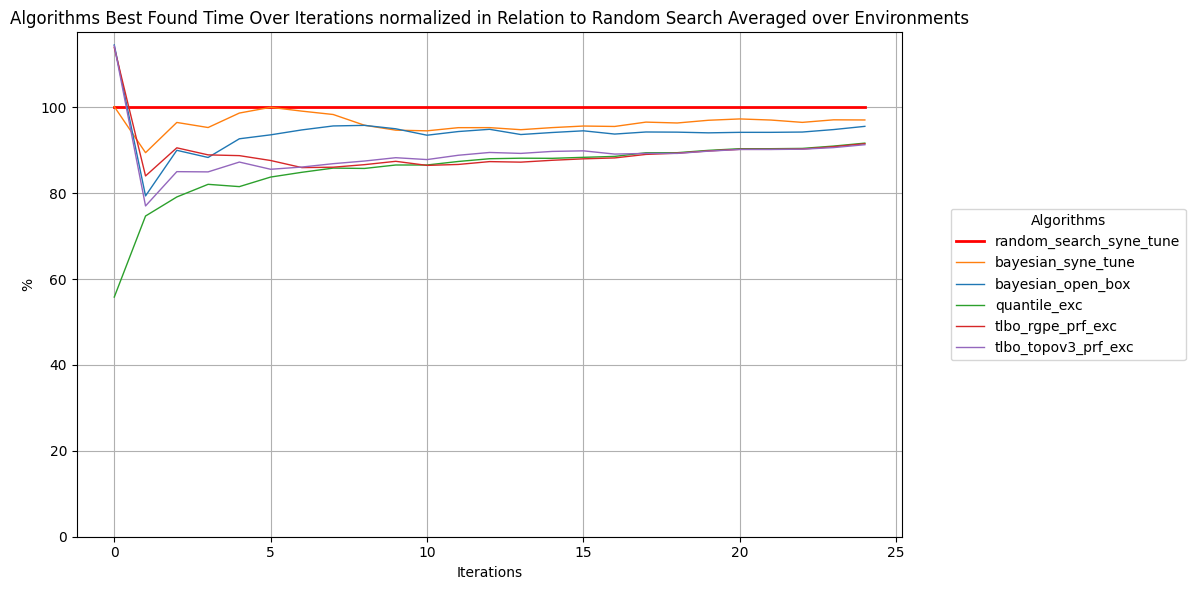

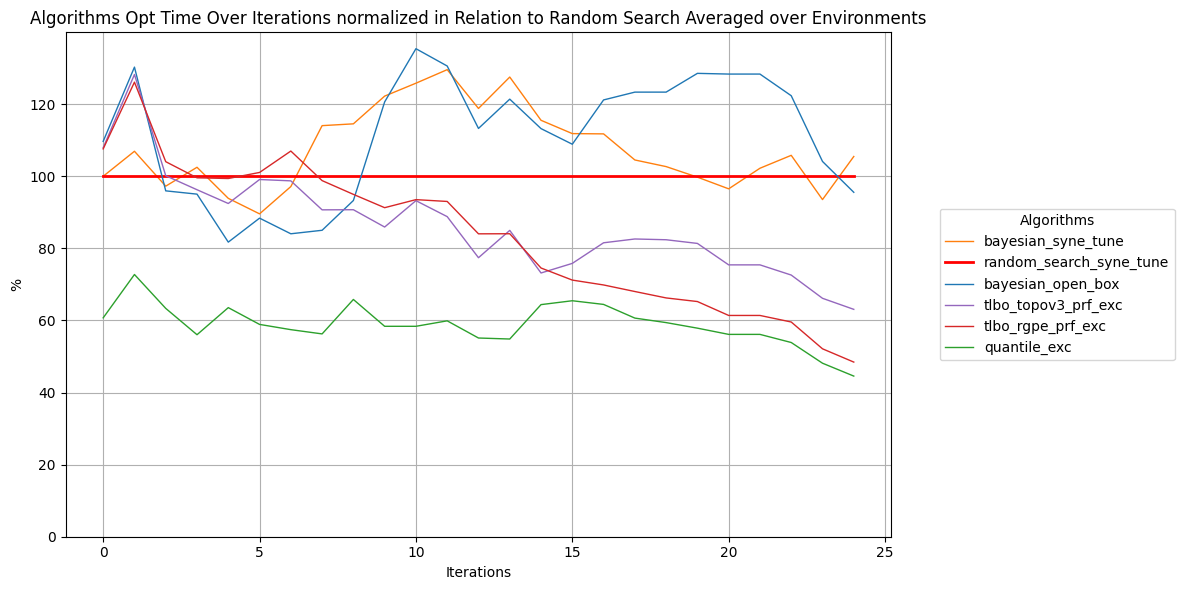

In [285]:
from itertools import cycle

algorithms = [
    "random_search_syne_tune", 
    "bayesian_open_box", 
    "bayesian_syne_tune", 
    #"zero_shot_exc",
    #"zero_shot_all",
    "quantile_exc",
    #"quantile_all", 
    #"cost_model_rfs_all",
    #"cost_model_rfs_exc",
    #"tlbo_rgpe_prf_all",
    #"tlbo_sgpr_prf_all",    
    #"tlbo_topov3_prf_all",    
    #"tlbo_rgpe_gp_all",    
    #"tlbo_sgpr_gp_all",
    #"tlbo_topov3_gp_all",    
    "tlbo_rgpe_prf_exc",    
    #"tlbo_sgpr_prf_exc",    
    "tlbo_topov3_prf_exc",
    #"tlbo_rgpe_gp_exc",    
    #"tlbo_sgpr_gp_exc",    
    #"tlbo_topov3_gp_exc", 
    #"heuristic"
]

file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/old_results/results_cpu_not_set_properly/results_1310k_shorter_runs/*/*/*.csv')

environments_list = ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"]
    

plots = [
        #["title",tpye,normalize,unit],
        ["Algorithms Best Found Time Over Iterations Averaged over Environments",
         'best',False,'seconds',25,file_list,environments_list,algorithms],
    
        ["Algorithms Opt Time Over Iterations Averaged over Environments",
        'opt',False,'seconds',25,file_list,environments_list,algorithms],
    
        ["Algorithms Best Found Time Over Iterations normalized in Relation to Random Search Averaged over Environments",
         'best',True,"%",25,file_list,environments_list,algorithms],
    
        ["Algorithms Opt Time Over Iterations normalized in Relation to Random Search Averaged over Environments",
         'opt',True,"%",25,file_list,environments_list,algorithms],
]

for args in plots:
    plot(args)

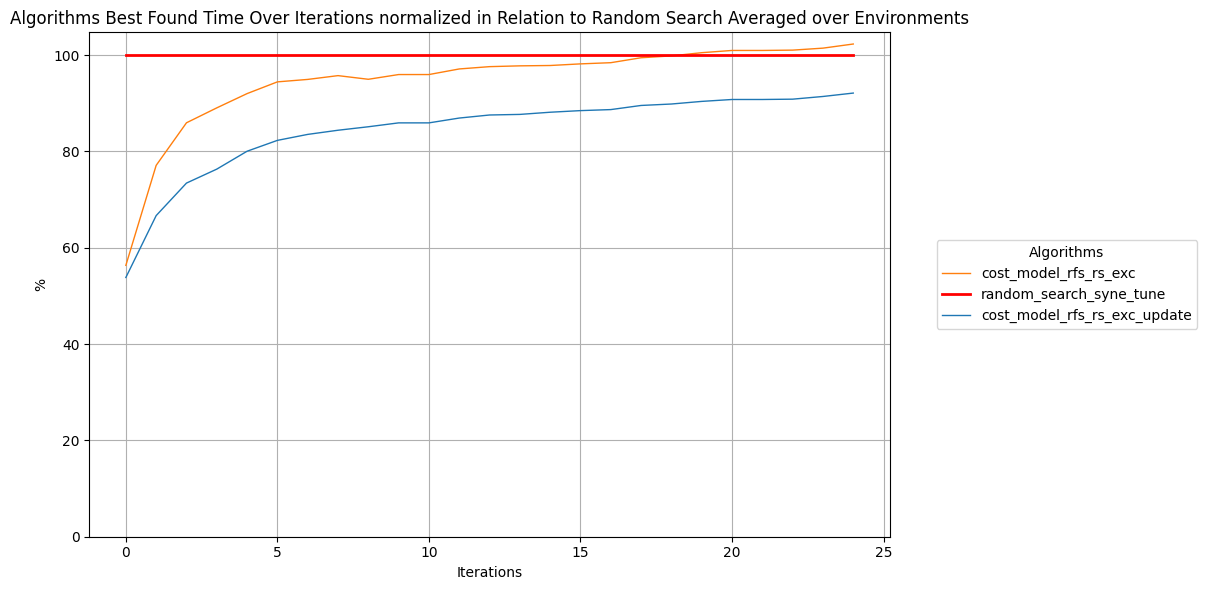

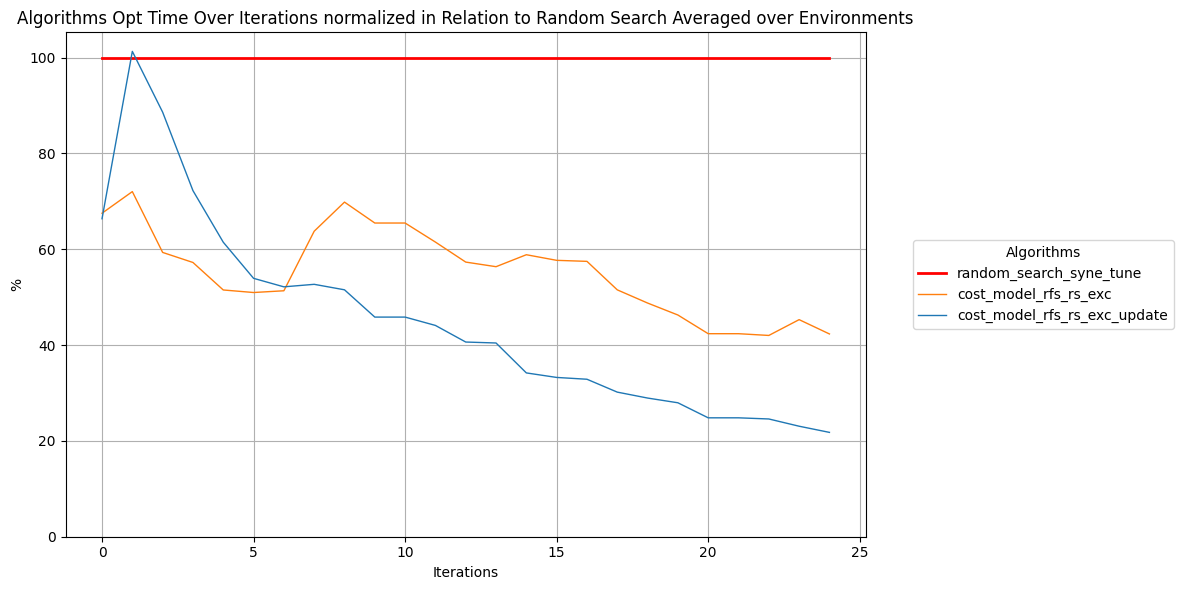

In [20]:
from itertools import cycle

algorithms = ["random_search_syne_tune", "cost_model_rfs_rs_exc_update", "cost_model_rfs_rs_exc"]

file_list = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/old_results/results_cpu_not_set_properly/results_1310k/S*/*/*.csv')

environments_list = ["S16_C16_N1000", "S16_C8_N100", "S8_C1_N50", "S16_C16_N10000", "S16_C4_N10", "S8_C8_N500", "S2_C2_N20", "S16_C1_N1000", "S16_C1_N10"]

plots = [
        #["title",tpye,normalize,unit],
        #["Algorithms Best Found Time Over Iterations Averaged over Environments",
        #'best',False,'seconds',25,file_list,environments_list,algorithms],

        #["Algorithms Opt Time Over Iterations Averaged over Environments",
        #'opt',False,'seconds',25,file_list,environments_list,algorithms],
    
        ["Algorithms Best Found Time Over Iterations normalized in Relation to Random Search Averaged over Environments",
         'best',True,"%",25,file_list,environments_list,algorithms],
    
        ["Algorithms Opt Time Over Iterations normalized in Relation to Random Search Averaged over Environments",
         'opt',True,"%",25,file_list,environments_list,algorithms],
]

for args in plots:
    plot(args)